In [44]:
%matplotlib inline

%matplotlib inline
%load_ext autoreload
%autoreload 2

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeat
#import regionmask
import pandas as pd
from datetime import datetime, timedelta
import utils

from matplotlib.pyplot import cm


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
G = xr.open_dataset(f'Outputs/G_mean_all_loc_all_times_BC_total.nc4', chunks = 'auto')

In [18]:
emis_profile = np.ones(15)*1e-5

<ipython-input-19-ebeb4244433d>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(0,10))


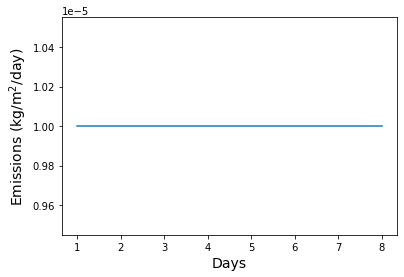

In [19]:
fig, ax = plt.subplots()
plt.plot(emis_profile)
plt.xlabel('Days', fontsize = 14)
ax.set_xticklabels(np.arange(0,10))
plt.ylabel(r'Emissions (kg/m$^2$/day)', fontsize = 14)
plt.savefig('figures/sample_emis.png', bbox_inches = 'tight', dpi = 300)

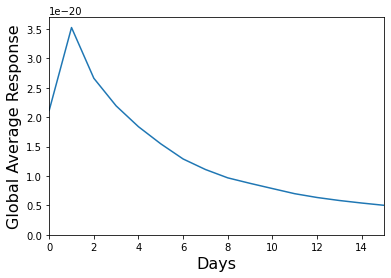

In [20]:
fig, ax = plt.subplots()
plt.plot(np.arange(0,len(G.sel(run = 'all_countries_Jan')['BC_total'])), G.sel(run = 'all_countries_Jan')['BC_total'])
plt.ylabel('Global Average Response', fontsize = 16)
plt.xlabel('Days', fontsize = 16)
plt.xlim(0,15)
plt.ylim(0,None)
plt.savefig('figures/sample_GF.png', bbox_inches = 'tight', dpi = 300)

In [21]:
import scipy.signal as signal

In [22]:
conv_ex = signal.convolve(np.array(G.sel(run = 'all_countries_Jan')['BC_total']), emis_profile, mode = 'full')

for t in np.arange(0,15):
    fig,ax = plt.subplots(figsize = (10,5), subplot_kw={'projection':ccrs.PlateCarree()})
    ax.coastlines()
    ax.add_feature(cfeat.STATES)
    ax.set_title('b) Difference', fontsize = 16)
    (ds_delta - ds_base)['AerMassBC'].isel(lev = 0, time = t).plot(ax = ax, vmin = 0, vmax = 2)
    plt.savefig(f'video_images/{t}_vid.png', bbox_inches = 'tight')

In [28]:
Ndt = 15
dt = 1 #days
t_range = np.arange(0., dt*Ndt, dt)
Δt = 1


In [29]:
C_df = pd.DataFrame(columns = np.arange(0, len(t_range)), index = t_range)


In [85]:
G.sel(run = 'all_countries_Jan')['BC_total'][:n+len(emis_profile[n:])-n]*emis_profile[n:]

<xarray.DataArray 'BC_total' (time: 14)>
dask.array<mul, shape=(14,), dtype=float64, chunksize=(14,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) timedelta64[ns] 0 days 1 days 2 days ... 12 days 13 days
    run      <U17 'all_countries_Jan'

[2.11438868e-25 3.52188244e-25 2.65988281e-25 2.19025554e-25
 1.83670464e-25 1.54553770e-25 1.28848101e-25 1.10952291e-25
 9.67725030e-26 8.74237813e-26 7.85881827e-26 6.98485967e-26
 6.34036969e-26 5.82867089e-26]
[4.22877735e-25 7.04376489e-25 5.31976562e-25 4.38051107e-25
 3.67340929e-25 3.09107540e-25 2.57696201e-25 2.21904582e-25
 1.93545006e-25 1.74847563e-25 1.57176365e-25 1.39697193e-25
 1.26807394e-25 5.82867089e-26]
[6.34316603e-25 1.05656473e-24 7.97964842e-25 6.57076661e-25
 5.51011393e-25 4.63661310e-25 3.86544302e-25 3.32856873e-25
 2.90317509e-25 2.62271344e-25 2.35764548e-25 2.09545790e-25
 1.26807394e-25 5.82867089e-26]
[8.45755471e-25 1.40875298e-24 1.06395312e-24 8.76102215e-25
 7.34681857e-25 6.18215080e-25 5.15392403e-25 4.43809164e-25
 3.87090012e-25 3.49695125e-25 3.14352731e-25 2.09545790e-25
 1.26807394e-25 5.82867089e-26]
[1.05719434e-24 1.76094122e-24 1.32994140e-24 1.09512777e-24
 9.18352321e-25 7.72768850e-25 6.44240504e-25 5.54761454e-25
 4.83862515e-25 4.

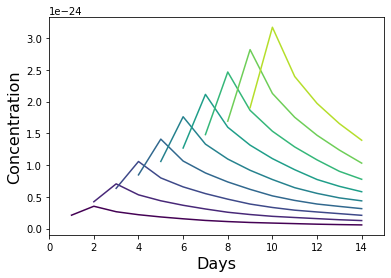

In [96]:
color = iter(cm.viridis(np.linspace(0, 1, 10)))
plt.figure()
zer = np.zeros(14)
for n in np.arange(1,10):
    c = next(color)
    
    zer[:n+len(emis_profile[n:])-n] += (G.sel(run = 'all_countries_Jan')['BC_total'][:n+len(emis_profile[n:])-n]*emis_profile[n:]).values
    print(zer)
    plt.plot(np.arange(n, 15),  zer[:n+len(emis_profile[n:])-n], c = c)
    plt.xlim(0,15)
    plt.xlabel('Days', fontsize = 16)
    plt.ylabel('Concentration', fontsize = 16)
    plt.savefig(f'video_images/000{n}.png', bbox_inches = 'tight', dpi = 300)

In [78]:
for i in np.arange(0,10):
    for n in np.arange(0,10):
        i = int(i)
        n = int(n)
        print(i,n)
        print((G.sel(run = 'all_countries_Jan')['BC_total'][:n+len(emis_profile[n:])-n]*emis_profile[n:]).values[i])
        C_df[i].loc[n] = (G.sel(run = 'all_countries_Jan')['BC_total'][:n+len(emis_profile[n:])-n]*emis_profile[n:]).values[i]
        

0 0
2.114388677213201e-25
0 1
2.114388677213201e-25
0 2
2.114388677213201e-25
0 3
2.114388677213201e-25
0 4
2.114388677213201e-25
0 5
2.114388677213201e-25
0 6
2.114388677213201e-25
0 7
2.114388677213201e-25
0 8
2.114388677213201e-25
0 9
2.114388677213201e-25
1 0
3.52188244269467e-25
1 1
3.52188244269467e-25
1 2
3.52188244269467e-25
1 3
3.52188244269467e-25
1 4
3.52188244269467e-25
1 5
3.52188244269467e-25
1 6
3.52188244269467e-25
1 7
3.52188244269467e-25
1 8
3.52188244269467e-25
1 9
3.52188244269467e-25
2 0
2.6598828076576536e-25
2 1
2.6598828076576536e-25
2 2
2.6598828076576536e-25
2 3
2.6598828076576536e-25
2 4
2.6598828076576536e-25
2 5
2.6598828076576536e-25
2 6
2.6598828076576536e-25
2 7
2.6598828076576536e-25
2 8
2.6598828076576536e-25
2 9
2.6598828076576536e-25
3 0
2.190255536603415e-25
3 1
2.190255536603415e-25
3 2
2.190255536603415e-25
3 3
2.190255536603415e-25
3 4
2.190255536603415e-25
3 5
2.190255536603415e-25
3 6
2.190255536603415e-25
3 7
2.190255536603415e-25
3 8
2.190255

IndexError: index 6 is out of bounds for axis 0 with size 6

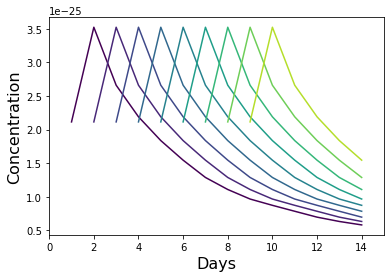

In [81]:
color = iter(cm.viridis(np.linspace(0, 1, 10)))
plt.figure()
for n in np.arange(1,10):
    
    c = next(color)
    plt.plot(np.arange(n, 15),  G.sel(run = 'all_countries_Jan')['BC_total'][:n+len(emis_profile[n:])-n]*emis_profile[n:], c = c)
    #plt.axvline(15)
    plt.xlim(0,15)
    plt.xlabel('Days', fontsize = 16)
    plt.ylabel('Concentration', fontsize = 16)
    plt.savefig(f'video_images/000{n}.png', bbox_inches = 'tight', dpi = 300)

<Figure size 432x288 with 0 Axes>

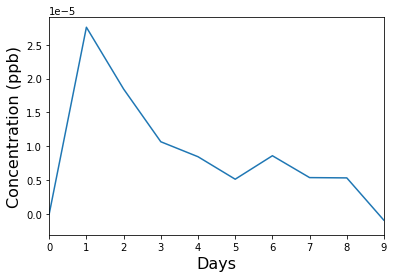

<Figure size 432x288 with 0 Axes>

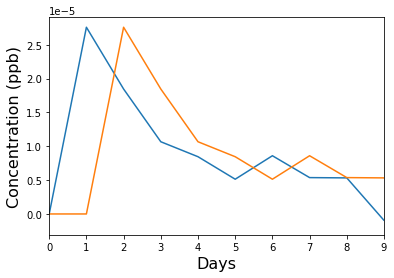

<Figure size 432x288 with 0 Axes>

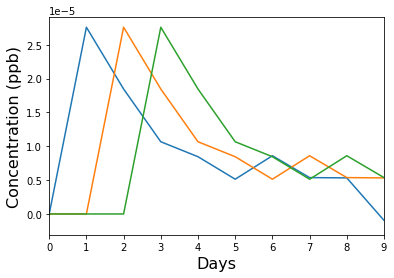

<Figure size 432x288 with 0 Axes>

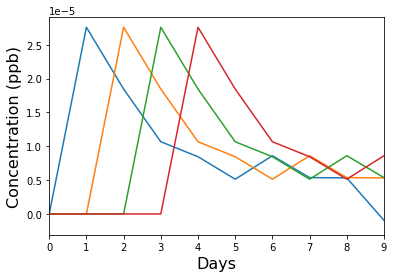

<Figure size 432x288 with 0 Axes>

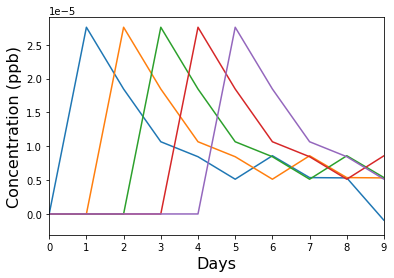

<Figure size 432x288 with 0 Axes>

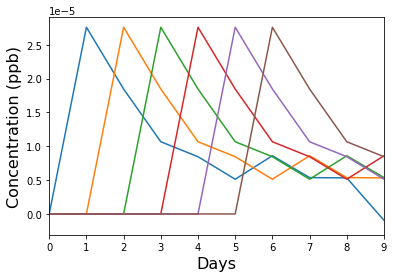

<Figure size 432x288 with 0 Axes>

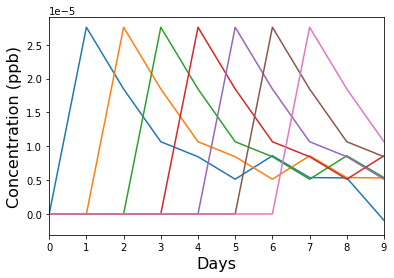

<Figure size 432x288 with 0 Axes>

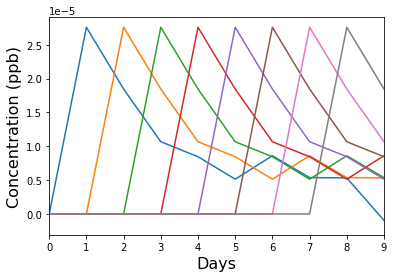

<Figure size 432x288 with 0 Axes>

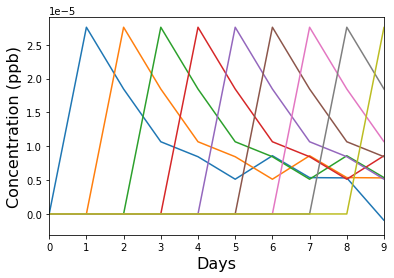

In [53]:
for n in np.arange(1,10):
    plt.figure()
    C_df[C_df.columns[:n]].plot(legend = False)
    #plt.axvline(15)
    plt.xlim(0,9)
    plt.xlabel('Days', fontsize = 16)
    plt.ylabel('Concentration (ppb)', fontsize = 16)
    plt.savefig(f'video_images/000{n}.png', bbox_inches = 'tight', dpi = 300)

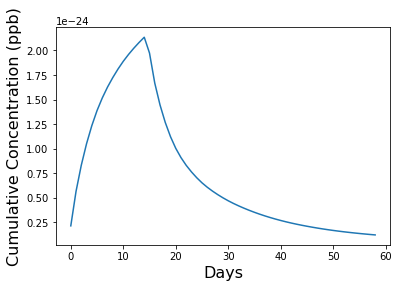

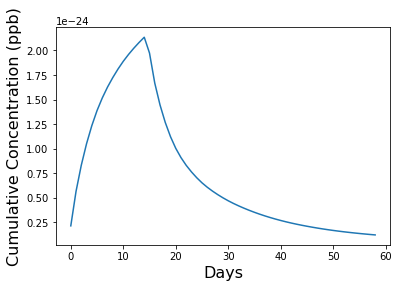

In [26]:
for n in np.arange(1,3):
    plt.figure()
    plt.plot(conv_ex)
    #plt.axvline(15)
   # plt.xlim(0,9)
    #plt.ylim(0,9e-5)
    plt.xlabel('Days', fontsize = 16)
    plt.ylabel('Cumulative Concentration (ppb)', fontsize = 16)
    #plt.savefig(f'video_images/000{n}.png', dpi = 300, bbox_inches = 'tight')

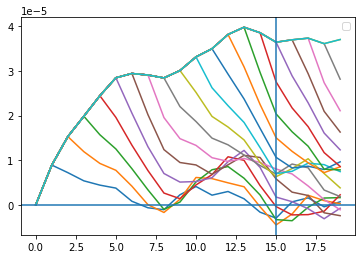

In [25]:
C_df.cumsum(axis = 1).plot()

plt.legend('')